In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

C:\Users\jdiaz\.conda\envs\fast_infl_funct\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Use some real data - Jiang et al

In [2]:
x = torch.from_numpy(
    np.load("../../../hydro-interpretive-dl/jiang_et_al_xtrain.npy")
).float()
y = torch.from_numpy(
    np.load("../../../hydro-interpretive-dl/jiang_et_al_ytrain.npy")
).float()
print(x.shape)

# Just use the first 100 examples of 180-day sequences
x = x[:100]
y = y[:100]

x.shape, y.shape

torch.Size([13872, 180, 2])


(torch.Size([100, 180, 2]), torch.Size([100, 1]))

# Define a simple model

In [3]:
class LSTM(torch.nn.Module):
    
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = torch.nn.LSTM(x.shape[2], 16, batch_first = True)
        self.fc = torch.nn.Linear(16, 1)
        
    def forward(self, x):
        x, (h, c) = self.lstm(x)
        x = x[:, -1, :] # only use the last output of the lstm
        x = self.fc(x)
        return(x)

# Make it
np.random.seed(123)
torch.manual_seed(123)
model = LSTM()

In [4]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

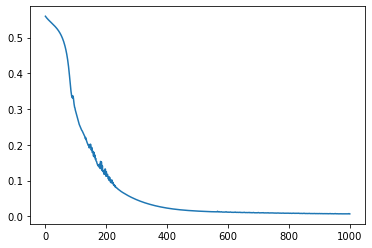

In [5]:
loss_ls = []
for i in range(1000):
    out = model(x)
    loss = loss_fn(out, y)
    optimizer.zero_grad()
    loss.backward()
    loss_ls.append(loss.item())
    optimizer.step()
plt.plot(loss_ls)

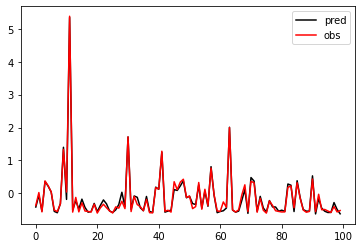

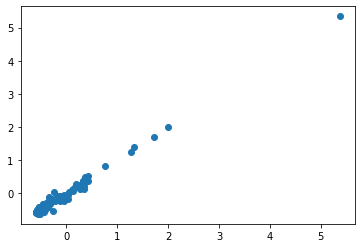

In [6]:
plt.plot(out.detach(), color = 'black', label = 'pred')
plt.plot(y, color = 'red', label = 'obs')
plt.legend()

plt.pause(0.001)
plt.scatter(y, out.detach());

# data loaders

In [7]:
x = torch.from_numpy(
    np.load("../../../hydro-interpretive-dl/jiang_et_al_xtrain.npy")
).float()
y = torch.from_numpy(
    np.load("../../../hydro-interpretive-dl/jiang_et_al_ytrain.npy")
).float()

x_train = x[:100]
y_train = y[:100]

x_test = x[-100:]
y_test = y[-100:]

In [8]:
# Put together dataloaders
train_data = []
for i in range(len(x_train)):
    train_data.append([x_train[i], y_train[i]])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=False, pin_memory=True)

In [9]:
# Put together dataloaders
test_data = []
for i in range(len(x_test)):
    test_data.append([x_test[i], y_test[i]])

test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False, pin_memory=True)

In [10]:
import sys
sys.path.insert(0, '../../../pytorch_influence_functions/')

In [11]:
import pytorch_influence_functions as ptif

In [12]:
%%time
# insanely memory hungery and lengthy computation
influence0, harmful0, helpful0, test_id_num0 = ptif.calc_influence_function.calc_influence_single(
    model,
    train_loader,
    test_loader,
    np.argmax(y_test).item(),
    gpu = -1,
    recursion_depth = 5,
    r = 5
)

Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Averaging r-times: [============================================...........] 4 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Averaging r-times: [====================================================

In [13]:
%%time
# insanely memory hungery and lengthy computation
influence1, harmful1, helpful1, test_id_num1 = ptif.calc_influence_function.calc_influence_single(
    model,
    train_loader,
    test_loader,
    np.argmax(y_test).item(),
    gpu = -1,
    recursion_depth = 5,
    r = 5
)

Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Averaging r-times: [============================================...........] 4 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Averaging r-times: [====================================================

In [14]:
%%time
# insanely memory hungery and lengthy computation
influence2, harmful2, helpful2, test_id_num2 = ptif.calc_influence_function.calc_influence_single(
    model,
    train_loader,
    test_loader,
    np.argmax(y_test).item(),
    gpu = -1,
    recursion_depth = 5,
    r = 5
)

Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Averaging r-times: [============================================...........] 4 / 5
Calc. s_test recursions: [=======================================..........] 4 / 5/ 5
Calc. s_test recursions: [=================================================] 5 / 5
Averaging r-times: [====================================================

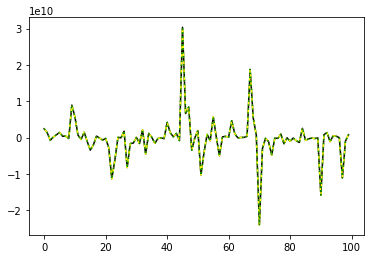

In [15]:
plt.plot(np.asarray(influence0), linestyle = '-', color = 'black')
plt.plot(np.asarray(influence1), linestyle = '--', color = 'yellow')
plt.plot(np.asarray(influence2), linestyle = ':', color = 'green')

# Leave-one-out across whole training set

In [16]:
raise ImportError

# RAN ON TALLGRASS GPU INSTANCE
x_test = x_test.cuda()

preds = []

for ref_i in range(100):
    print(ref_i)
    x_train_alt = torch.from_numpy(np.concatenate(
        [x_train[:ref_i], x_train[ref_i+1:]]
    )).float().cuda()
    y_train_alt = torch.from_numpy(np.concatenate(
        [y_train[:ref_i], y_train[ref_i+1:]]
    )).float().cuda()
    
    np.random.seed(123)
    torch.manual_seed(123)
    model = LSTM().cuda()
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters())

    for i in range(300): 
        out = model(x_train_alt)
        loss = loss_fn(out, y_train_alt)
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    preds.append(model(x_test).detach().cpu().numpy())
    
np.save('leave_one_out_preds.npy', np.asarray(preds)[:, :, 0])

ImportError: 

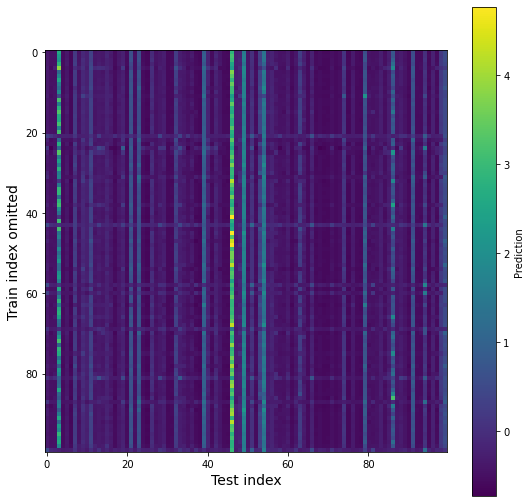

In [18]:
leave_out_out_preds = np.load('leave_one_out_preds.npy')

plt.figure(figsize = (9, 9))
plt.imshow(leave_out_out_preds)
plt.xlabel('Test index', fontsize = 14)
plt.ylabel('Train index omitted', fontsize = 14)
plt.colorbar(label = 'Prediction');

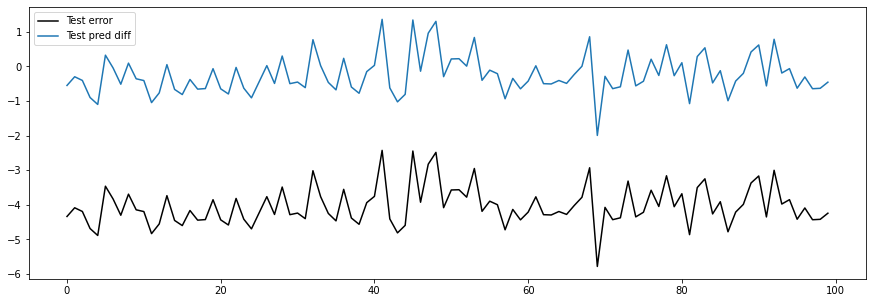

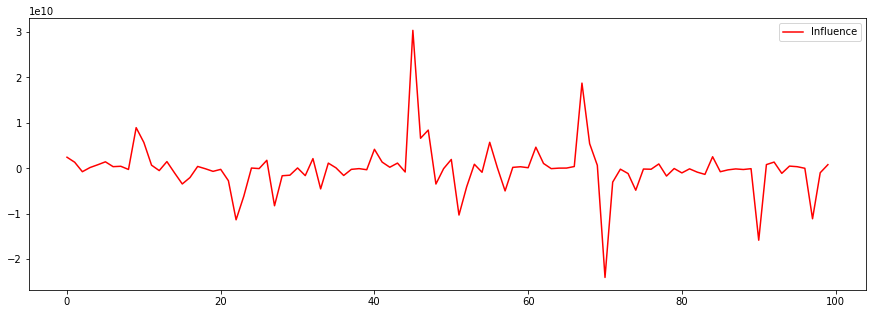

In [19]:
plt.figure(figsize = (15, 5))
plt.plot(leave_out_out_preds[:, 46] - y_test[46].item(), color = 'black', label = 'Test error')
plt.plot(leave_out_out_preds[:, 46] - model(x_test)[46].item(), label = 'Test pred diff')
plt.legend()
plt.pause(0.001)

plt.figure(figsize = (15, 5))
plt.plot(np.asarray(influence0), color = 'red', label = 'Influence')
plt.legend();

SpearmanrResult(correlation=0.12154815481548153, pvalue=0.22832981798523574)

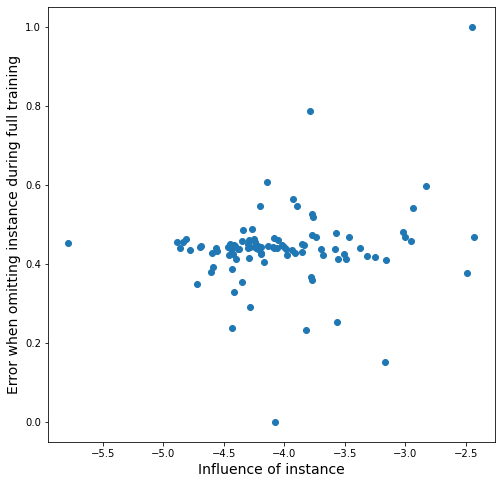

In [20]:
influence_clean = np.asarray(influence0)
influence_clean = (influence_clean - influence_clean.min()) / (influence_clean.max() - influence_clean.min())

from scipy.stats import spearmanr

plt.figure(figsize = (8, 8))
plt.scatter(leave_out_out_preds[:, 46] - y_test[46].item(), influence_clean)
plt.ylabel('Error when omitting instance during full training', fontsize = 14)
plt.xlabel('Influence of instance', fontsize = 14)

spearmanr(leave_out_out_preds[:, 46] - y_test[46].item(), influence_clean)